# Radiotelescope - CBN observation

In [32]:
# Mostra todos os resultados da célula, não apenas o último
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
InteractiveShell.ast_node_interactivity = "all"
# Truque para consertar caminhos do jupyter: variável __file__ não é definida em IPYTHON.
import project_path
import logging
import os
import sys
import astropy.units as u
from matplotlib.colors import LogNorm
import pandas as pd

sys.path.append(os.path.abspath(os.path.join(os.path.split(os.getcwd())[0])))
sys.path.append(os.path.abspath(os.path.join(os.path.split(os.getcwd())[0], "radiotelescope")))
sys.path.append(os.path.abspath(os.path.join(os.path.split(os.getcwd())[0], "radiotelescope/GNURadio")))
from radiotelescope.observations.observations import Observations as Obs
from radiotelescope.instruments import RTLSDRGNU
from radiotelescope.observations.observations import RFI_filter, plot_mosaic
logger = logging.getLogger("radiotelescope")
handler = logging.StreamHandler()
formatter = logging.Formatter(
        '%(asctime)s %(name)-12s %(levelname)-8s %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)
logger.setLevel(logging.DEBUG)

## Analisando Dados

#### Corneta Baixa

In [2]:
obs = Obs(duration=pd.Timedelta(24, unit="h")).initialize()
obs.backend = RTLSDRGNU
RTLSDRGNU.name = "SDR_BAIXA"
obs.load_observation(extension="fit");
df_baixa = obs.data

In [20]:
df = pd.DataFrame(obs.data.values.byteswap().newbyteorder(), columns = obs.data.columns, index=obs.data.index)

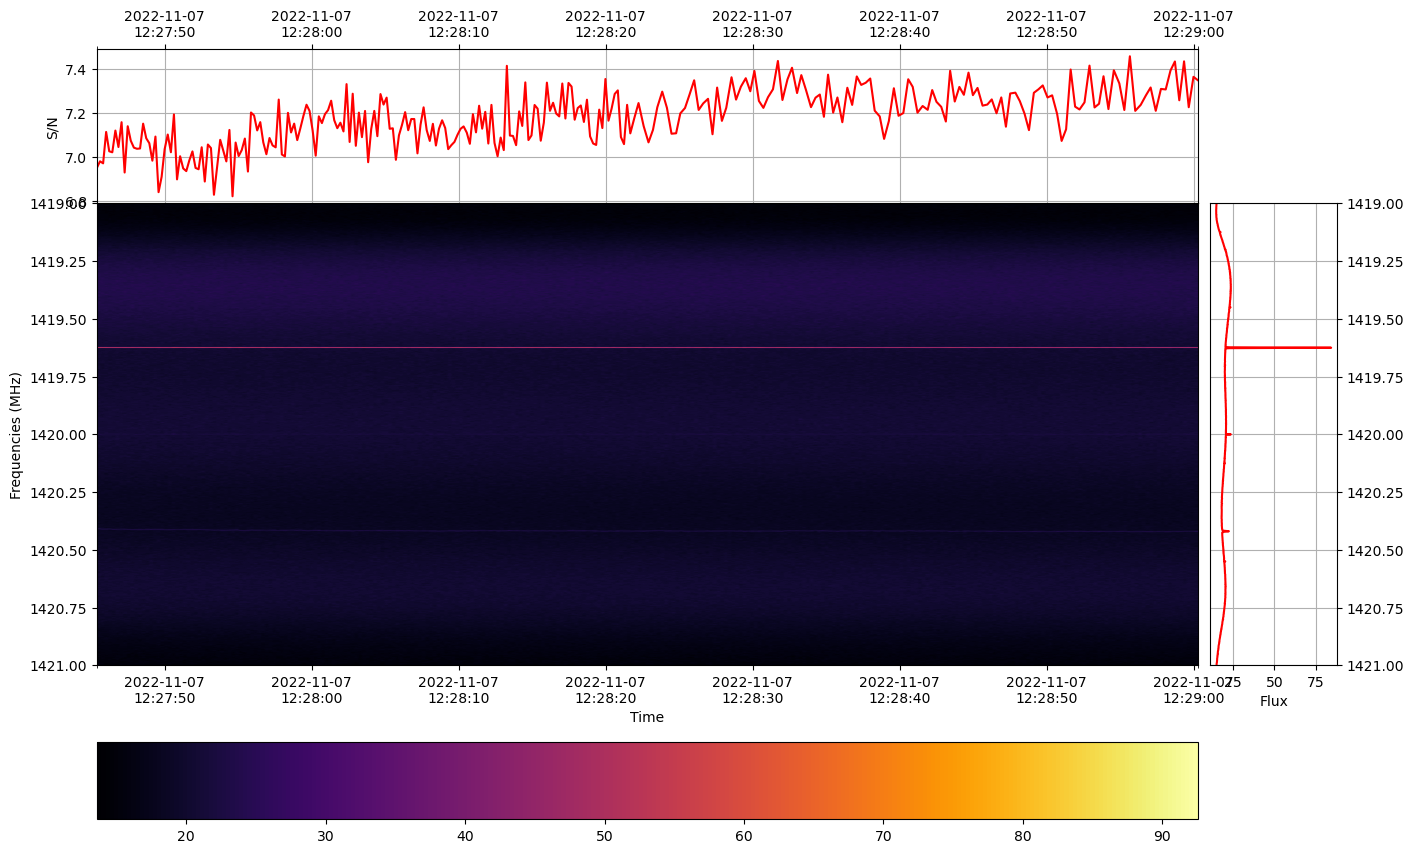

In [92]:
obs.plot_waterfall(df);

In [90]:
df_cal, _ = obs.calibrate(data=obs.data, T_rx=300, scale=100, flux=False)
df_rfi, _, _ = RFI_filter(df_cal, threshold=3, window=10)

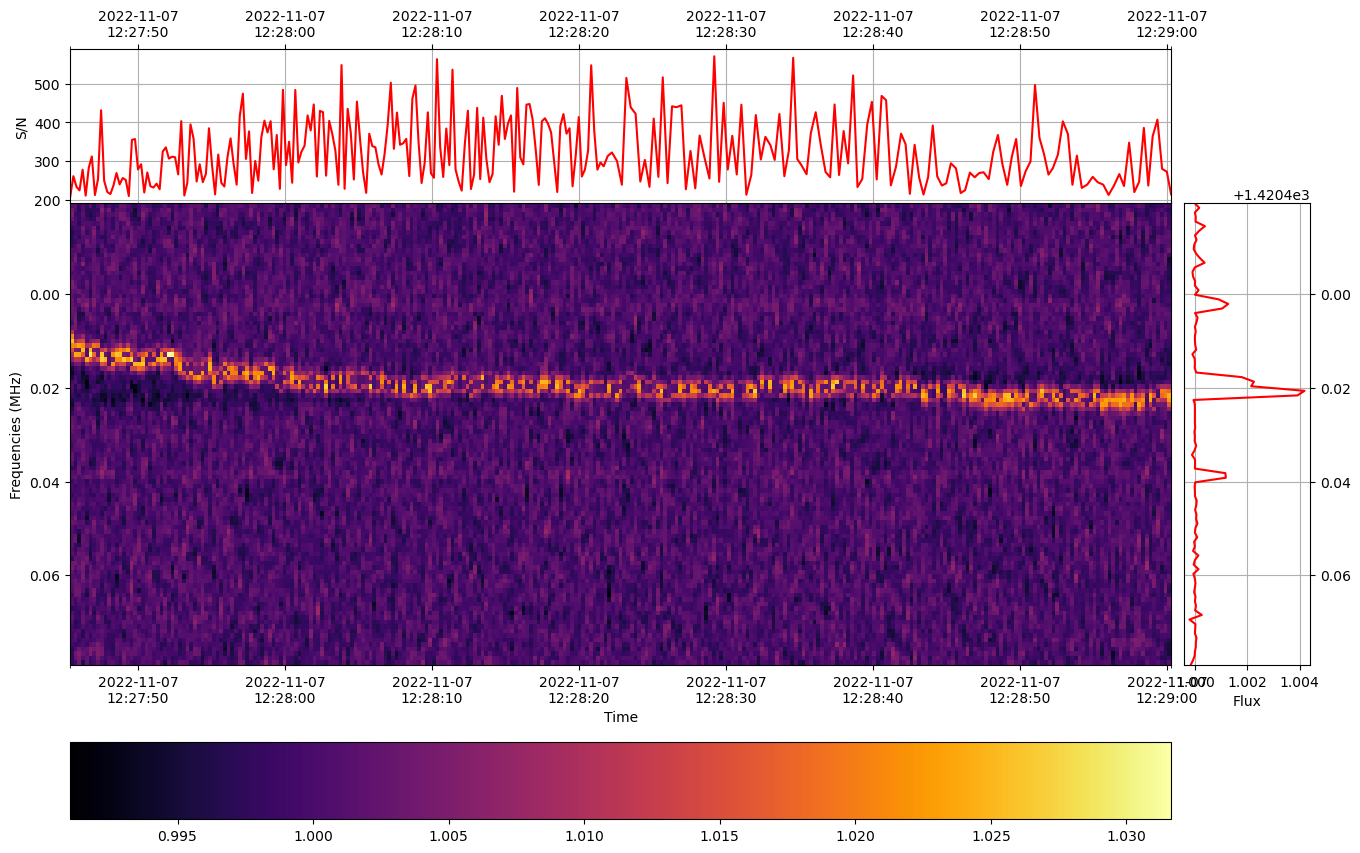

In [91]:
obs.plot_waterfall(df_rfi, freqs=[1420.38, 1420.48]);

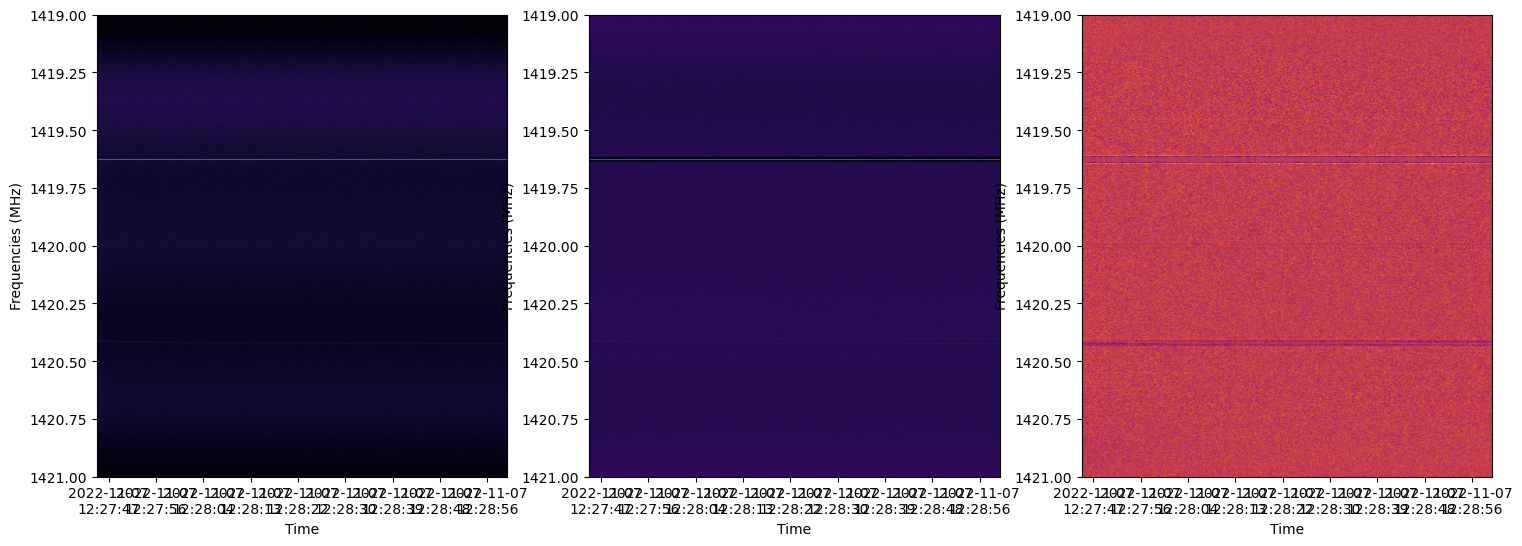

In [25]:
plot_mosaic([obs.data, df_cal, df_rfi]);

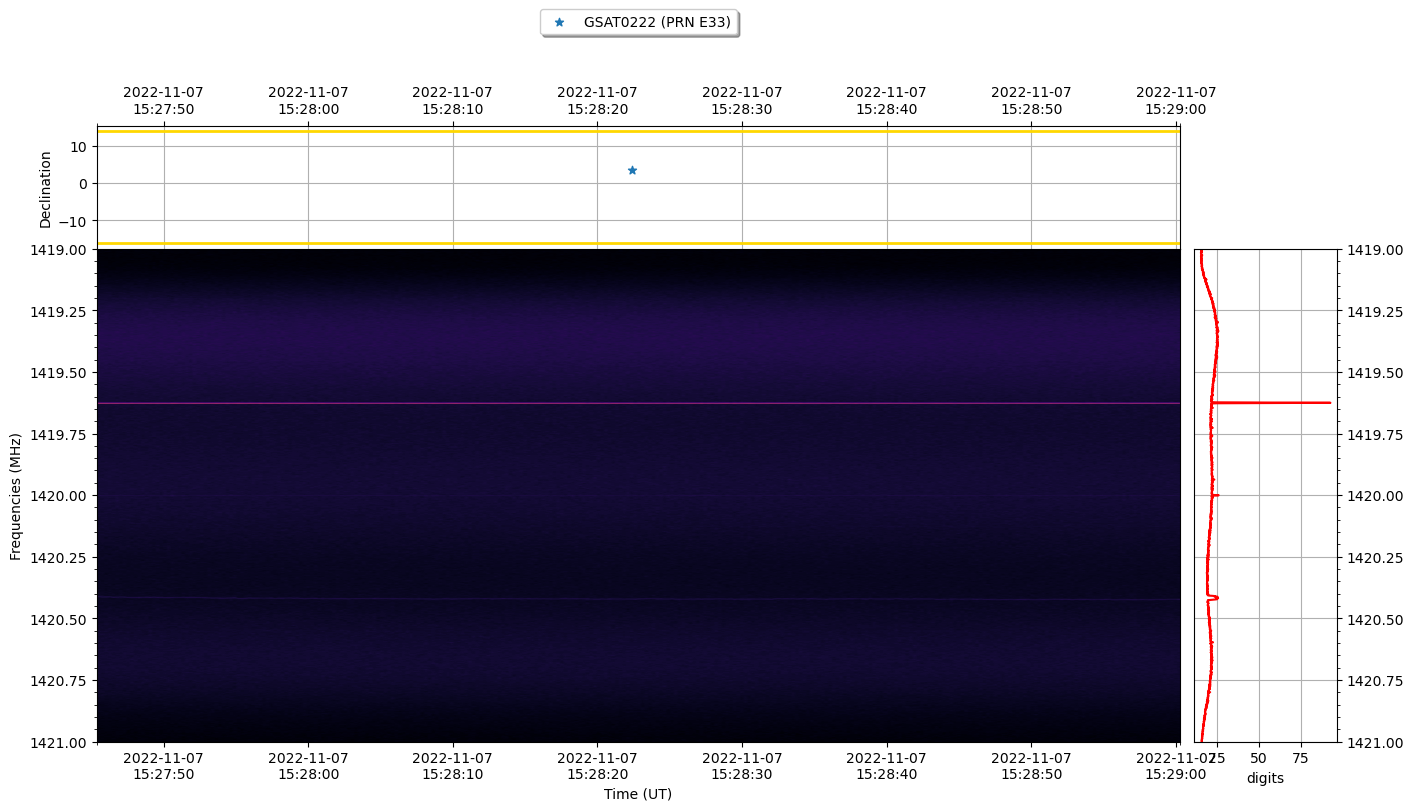

In [38]:
obs.make_sky().sky.plot_timeseries(obs.data);